# Convolutional Neural Networks for Image Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing the MNIST dataset
from tensorflow.keras.datasets import mnist

In [3]:
# In the dataset the data is aready splitted into train and test data,  so we have to do tubple unpacking for the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

##  Visualizing the Image Data

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_image = x_train[0]

single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
single_image.shape

(28, 28)

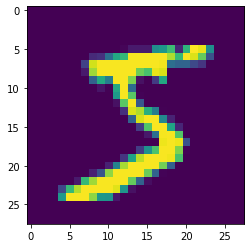

In [7]:
plt.imshow(single_image)

# PreProcessing Data

We first need to make sure the labels will be understandable by our CNN.

## Labels

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Hmmm, looks like our labels are literally categories of numbers. We need to translate this to be "one hot encoded" so our CNN can understand, otherwise it will think this is some sort of regression problem on a continuous axis. Luckily , Keras has an easy to use function for this:

In [10]:
from tensorflow.keras.utils import to_categorical

#### utils.to_categorical:
- Keras provides numpy utility library, which provides functions to perform actions on numpy arrays. 


- Using the method **to_categorical(), a numpy array (or) a vector which has integers that represent different categories, can be converted into a numpy array (or) a matrix which has binary values and has columns equal to the number of categories in the data**.


- **Syntax:** 
    - **tf.keras.utils.to_categorical(y, num_classes=None, dtype=”float32″)**
      - **y (input vector)**: A vector which has integers representing various classes in the data.

      - **num_classes**: Total number of classes. If nothing is mentioned, it considers the largest number of the input vector and adds 1, to get the number of classes.
Its default value is "None".

      - **dtype**: It is the desired data type of the output values.

In [11]:
y_train.shape

(60000,)

In [12]:
y_example = to_categorical(y=y_train)

In [13]:
y_example.shape

(60000, 10)

In [14]:
y_example[0] 

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [15]:
# Converting the "train" and "test" labels into binary form with the help of "to_categorical" method
y_cat_test = to_categorical(y=y_test, num_classes = 10)
y_cat_train = to_categorical(y=y_train, num_classes = 10)

### Processing X Data

We should normalize the X data or Training Data

In [16]:
# Max and Min size of a single pixel in an image
single_image.max(), single_image.min()

(255, 0)

In [17]:
# Scaling the X_train and x_test between 0 and 1
x_train = x_train / 255
x_test = x_test / 255  

In [18]:
scaled_image = x_train[0]
# scaled_image

In [19]:
# Max and Min size of a single pixel in an scaled_image
scaled_image.max(), scaled_image.min()

(1.0, 0.0)

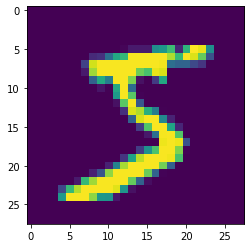

In [20]:
plt.imshow(scaled_image)

## Reshaping the Data

Right now our data is 60,000 images stored in 28 by 28 pixel array formation. 

This is correct for a CNN, but we need to add one more dimension to show we're dealing with 1 RGB channel (since technically the images are in black and white, only showing values from 0-255 on a single channel), an color image would have 3 dimensions.

In [21]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [51]:
# x_train[0]

Reshape to include channel dimension (in this case, 1 channel)

In [52]:
# 4 dimensions are:- batch_size, width, height, color_channels
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [53]:
# x_train[0]

In [54]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

# Training the Model


#### Flatten layer:
- ***Flattening is used to convert all the resultant 2-Dimensional arrays from pooled feature maps into a `single long continuous linear vector`***


- ***The flattened matrix is fed as input to the fully connected layer to classify the image***

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

### Main thing we have to figure out is what do we choose th value for the parameters in Conv2D ?

- **Syntax for Conv2D**
     - **Conv2D( 
     filters,
     kernel_size,
    strides=(1, 1),
    padding='valid',
    data_format=None,
    dilation_rate=(1, 1),
    groups=1,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    kwargs,)**

#### It's based roughly off the input data that's coming in.


- **filters:**
    
    - ***Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution)***
    - ***Really typical values for the number of filters is the more complex the data set, so essentially, the larger the images, the more variety and images and more classes we're trying to classify, then the more filters we should have. And it's really common to choose filters based off power of two***


- **kernel_size(window_size):**

    - ***An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution `window`.***
    - Typical size of image kernela are something in the range of 2x2 or 4x4.
    
    
- **strides:**
    - ***An integer or tuple/list of 2 integers, specifying the strides of the convolution along the height and width. Can be a single integer to specify the same value for all spatial dimensions.***
    - Basically how big of a stride are we taking as we're moving the **kernel** along the image.
    

- **padding:**
    - one of `"valid"` or `"same"` (case-insensitive).
        - **`"valid"` means no padding.** 
        - **`"same"` results in padding with zeros evenly to the left/right or up/down of the input.**
        - **"same" automatically figures out what the padding should be, so it's goinh to apply padding to the input only if needed so that the input image gets fully covered by the `filters` and `strides` that we specified.**
            - When `padding="same"` and    `strides=1`, the output has the same size as the input.
            
        
     - ex. of padding:-
          - If we have 28(pixels)/4(dimensions) = 7.0, that goes evenly seven times and we only doing stride of 1.
          - So if we move our kernel, which is 4x4 along our 28x28 image, we shouldn't have a need for padding because we won't actually overshoot becox we fit perfectly with a stide of 1.
  
  
- **input_shape:(height, width, color_channel)**
    - **It's just the input shape for a single image**

In [60]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters= 32, kernel_size=(4,4), strides=(1,1), padding='valid', input_shape=(28,28,1), activation='relu'))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# After our series of Convolution and Padding layers, we'll need to "flatten out" tha image
# So flttening out the images, that essentially means take a 28x28 image or any (x,y)pixel image 
#and then flatten out to be just "a single array"
# In our case it is 28*28 = 784 points or x*y point

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())
# In between the Conv2D layers and the dense layer, there is a ‘Flatten’ layer. 
# **Flatten serves as a connection between the convolution and dense layers**.

# Once we're able to flatten out the image, we can do is we can start adding our "Dense" layers, 
#and it;s usually a good idea to add in one final dense layer

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(units=128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
# OUTPUT LAYER SOFTMAX--> we use "softmax" activation for MULTI CLASS PROBLEM
model.add(Dense(units=10, activation='softmax'))

# .compile:- Configures the model for training.
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

### COMPILING the MODEL

- Compiling the model takes three parameters: 
    - **optimizer**, 
    - **loss** and 
    - **metrics**
 
 
- **optimizer**:
    - ***Optimization is an important process which optimize the input weights by comparing the prediction and the loss function***
    - ***The optimizer controls the `learning rate`***.
        - The learning rate determines how fast the optimal weights for the model are calculated. A smaller learning rate may lead to more accurate weights (up to a certain point), but the time it takes to compute the weights will be longer.
        
        
- **loss**:
    - ***Loss function is used to find error or deviation in the learning process.***
    - ***You must specify the loss function to use `to evaluate a set of weights`***


- **metrics:**
    - ***Any optional metrics you want to collect and report during training***.

In [61]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 4608)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               589952    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
________________________________________________

In [62]:
from tensorflow.keras.callbacks import EarlyStopping

In [63]:
early_stop= EarlyStopping(monitor='val_loss', patience=2) 

## Train the Model

In [64]:
model.fit(x=x_train, 
          y=y_cat_train, 
          epochs=10,
          validation_data=(x_test, y_cat_test),
          callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1365 - accuracy: 0.9591 - val_loss: 0.0677 - val_accuracy: 0.9788
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0470 - accuracy: 0.9855 - val_loss: 0.0419 - val_accuracy: 0.9859
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0302 - accuracy: 0.9909 - val_loss: 0.0393 - val_accuracy: 0.9866
Epoch 4/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0196 - accuracy: 0.9938 - val_loss: 0.0393 - val_accuracy: 0.9874
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0148 - accuracy: 0.9953 - val_loss: 0.0429 - val_accuracy: 0.9877
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0113 - accuracy: 0.9960 - val_loss: 0.0433 - val_accuracy: 0.9880


## Evaluate the Model

In [80]:
metrics = pd.DataFrame(model.history.history)

metrics

""


In [81]:
metrics[['loss','val_loss']].plot()

KeyError: "None of [Index(['loss', 'val_loss'], dtype='object')] are in the [columns]"

In [82]:
metrics[['accuracy', 'val_accuracy']].plot()

KeyError: "None of [Index(['accuracy', 'val_accuracy'], dtype='object')] are in the [columns]"

In [83]:
model.metrics_names

['loss', 'accuracy']

In [84]:
# If we actually want to get the metrics of the "loss" or "accuracy" on any set of data we can use "evaluate"
model.evaluate(x_test, y_cat_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0433 - accuracy: 0.9880


[0.04328303039073944, 0.9879999756813049]

In [85]:
from sklearn.metrics import classification_report, confusion_matrix

In [86]:
# predictions = model.predict_classes(x_test) # Doest not work any more
preds_prob = model.predict(x_test) # Use this instead. This will output probabilities
predictions = np.argmax(preds_prob,axis=1) # Converts the probabilities to the particular predictions = np.argmax(preds_prob,axis=1) # Converts the probabilities to the particular class. Use this for multi-class classification.

313/313 [==============================] - 1s 3ms/step


In [95]:
# preds_prob

In [96]:
# predictions

In [89]:
y_cat_test.shape

(10000, 10)

In [90]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [91]:
predictions[0]

7

In [92]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.98      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [45]:
print(confusion_matrix(y_test, predictions))

[[ 975    0    1    0    0    0    1    1    2    0]
 [   1 1132    0    0    0    0    1    0    1    0]
 [   1    1 1019    0    2    0    1    6    2    0]
 [   0    0    1  999    0    3    0    3    4    0]
 [   0    1    0    0  973    0    0    0    0    8]
 [   1    0    0    6    0  883    1    0    1    0]
 [   6    2    0    0    4    3  942    0    1    0]
 [   0    2    9    0    0    0    0 1016    1    0]
 [   2    0    0    0    0    2    0    2  964    4]
 [   2    2    0    1    7    3    0    4    1  989]]


<AxesSubplot:>

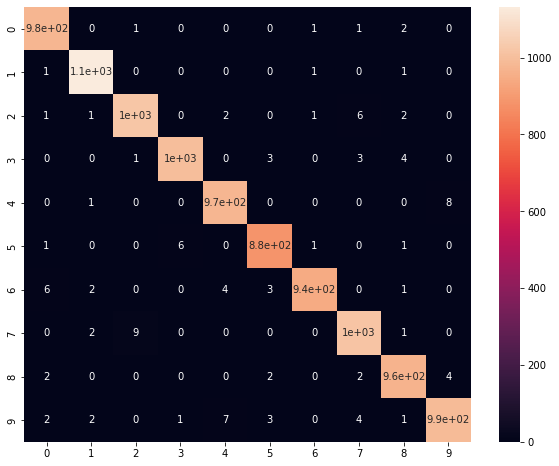

In [46]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

# Predicting a given image

In [47]:
my_number = x_test[0]

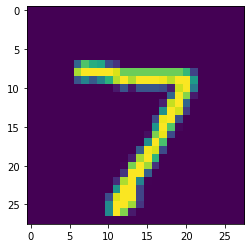

In [48]:
plt.imshow(my_number.reshape(28,28))

In [49]:
# SHAPE --> (num_images,width,height,color_channels)
new_data = model.predict(my_number.reshape(1, 28, 28, 1))
np.argmax(new_data, axis=1 )

1/1 [==============================] - 0s 18ms/step


array([7], dtype=int64)